In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to bypass warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "/home/dcti-02-11/projects/amoye_internship/sept/Food_Balance_Analysis_using_Python/data/FoodBalanceSheets_E_Africa_NOFLAG.csv"

df = pd.read_csv(file_path, encoding="latin-1")

In [12]:
df.head(10)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28
5,4,Algeria,2903,Vegetal Products,664,Food supply (kcal/capita/day),kcal/capita/day,2932.00,2958.00,2941.00,2921.00,2932.00
6,4,Algeria,2903,Vegetal Products,674,Protein supply quantity (g/capita/day),g/capita/day,67.14,67.38,67.37,66.11,67.10
7,4,Algeria,2903,Vegetal Products,684,Fat supply quantity (g/capita/day),g/capita/day,53.84,54.72,52.04,55.59,54.57
8,4,Algeria,2941,Animal Products,664,Food supply (kcal/capita/day),kcal/capita/day,444.00,421.00,431.00,421.00,390.00
9,4,Algeria,2941,Animal Products,674,Protein supply quantity (g/capita/day),g/capita/day,27.76,26.97,27.35,26.71,24.73


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [21]:
print("Basic statistics:")
df.describe()

Basic statistics:


,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [17]:
# Unique values in the "Element" column
unique_elements = df['Element'].unique()

# Print the unique values one below the other
for element in unique_elements:
    print(element)

Total Population - Both sexes
Domestic supply quantity
Food supply (kcal/capita/day)
Protein supply quantity (g/capita/day)
Fat supply quantity (g/capita/day)
Production
Import Quantity
Stock Variation
Export Quantity
Feed
Seed
Losses
Processing
Other uses (non-food)
Residuals
Food
Food supply quantity (kg/capita/yr)
Tourist consumption


In [18]:
# Number of unique countries in the "Area" column
unique_countries_count = df['Area'].nunique()

print("Number of unique countries:", unique_countries_count)

Number of unique countries: 49


In [19]:
# Group the data by 'Element' and calculate the sum of 'Stock Variation' for each year
grouped_data = df.groupby(['Element'])[['Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']].sum()

# Find the year with the highest sum of 'Stock Variation' for each element
highest_stock_variation_year = grouped_data.idxmax(axis=1)

print(highest_stock_variation_year)

Element
Domestic supply quantity                  Y2018
Export Quantity                           Y2017
Fat supply quantity (g/capita/day)        Y2018
Feed                                      Y2018
Food                                      Y2018
Food supply (kcal/capita/day)             Y2018
Food supply quantity (kg/capita/yr)       Y2014
Import Quantity                           Y2017
Losses                                    Y2018
Other uses (non-food)                     Y2017
Processing                                Y2018
Production                                Y2018
Protein supply quantity (g/capita/day)    Y2017
Residuals                                 Y2016
Seed                                      Y2018
Stock Variation                           Y2014
Total Population - Both sexes             Y2018
Tourist consumption                       Y2014
dtype: object


In [11]:
# Food Supply and Nutrition
food_supply = df[df['Element'] == 'Food supply (kcal/capita/day)']
protein_supply = df[df['Element'] == 'Protein supply quantity (g/capita/day)']
fat_supply = df[df['Element'] == 'Fat supply quantity (g/capita/day)']

# Extract the years of interest
years = ['Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']
food_supply_years = food_supply[years].mean()
protein_supply_years = protein_supply[years].mean()
fat_supply_years = fat_supply[years].mean()

print(food_supply_years)
print(protein_supply_years)
print(fat_supply_years)

Y2014    91.824742
Y2015    91.500101
Y2016    91.035664
Y2017    91.577241
Y2018    91.620246
dtype: float64
Y2014    2.384941
Y2015    2.380597
Y2016    2.366350
Y2017    2.378002
Y2018    2.373357
dtype: float64
Y2014    2.059529
Y2015    2.057849
Y2016    2.028669
Y2017    2.058177
Y2018    2.057086
dtype: float64


In [13]:
# Cereal Production and Consumption
wheat_production = df[(df['Item'] == 'Wheat and products') & (df['Element'] == 'Production')]
wheat_import = df[(df['Item'] == 'Wheat and products') & (df['Element'] == 'Import Quantity')]
wheat_export = df[(df['Item'] == 'Wheat and products') & (df['Element'] == 'Export Quantity')]
wheat_domestic_supply = df[(df['Item'] == 'Wheat and products') & (df['Element'] == 'Domestic supply quantity')]

cereal_years = wheat_production[years].mean()
wheat_import_years = wheat_import[years].mean()
wheat_export_years = wheat_export[years].mean()
wheat_domestic_supply_years = wheat_domestic_supply[years].mean()

print(cereal_years)
print(wheat_import_years)
print(wheat_export_years)
print(wheat_domestic_supply_years)

Y2014    586.651163
Y2015    672.558140
Y2016    537.860465
Y2017    605.395349
Y2018    671.720930
dtype: float64
Y2014    1051.555556
Y2015    1001.066667
Y2016    1121.466667
Y2017    1081.022222
Y2018    1031.622222
dtype: float64
Y2014    42.534884
Y2015    42.139535
Y2016    32.625000
Y2017    36.261905
Y2018    37.439024
dtype: float64
Y2014    1529.866667
Y2015    1511.711111
Y2016    1627.800000
Y2017    1584.644444
Y2018    1613.355556
dtype: float64


In [14]:
# Cereal Usage Breakdown
cereal_usage = df[(df['Item'] == 'Cereals - Excluding Beer') & (df['Element'] != 'Production')]
cereal_usage_years = cereal_usage[years].mean()
print(cereal_usage_years)

Y2014    1001.380329
Y2015     996.410719
Y2016    1046.660000
Y2017    1069.381757
Y2018    1064.319505
dtype: float64


In [15]:
# Stock Variations
stock_variations = df[df['Element'] == 'Stock Variation']
stock_variations_years = stock_variations[years].mean()
print(stock_variations_years)

Y2014    13.888849
Y2015     8.255141
Y2016     7.832692
Y2017    12.837842
Y2018     4.879751
dtype: float64


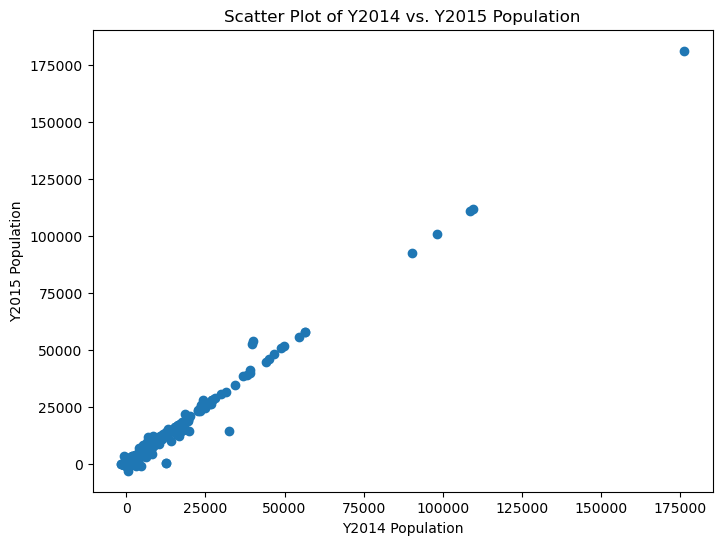

In [22]:
# Example: Scatter plot for two numerical columns (e.g., 'Y2014' vs. 'Y2015' for population)
plt.figure(figsize=(8, 6))
plt.scatter(df['Y2014'], df['Y2015'])
plt.title('Scatter Plot of Y2014 vs. Y2015 Population')
plt.xlabel('Y2014 Population')
plt.ylabel('Y2015 Population')
plt.show()

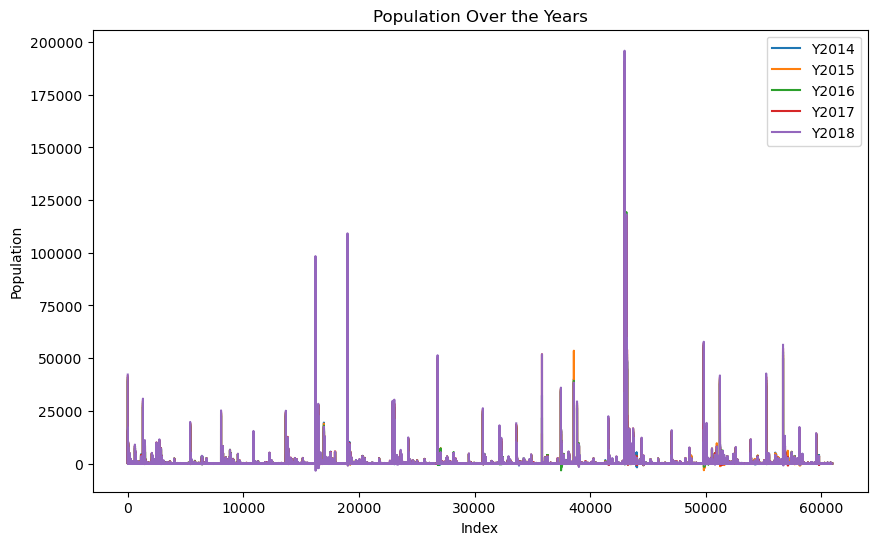

In [23]:
# Time series plot for population over the years
plt.figure(figsize=(10, 6))
plt.plot(df['Y2014'], label='Y2014')
plt.plot(df['Y2015'], label='Y2015')
plt.plot(df['Y2016'], label='Y2016')
plt.plot(df['Y2017'], label='Y2017')
plt.plot(df['Y2018'], label='Y2018')
plt.title('Population Over the Years')
plt.xlabel('Index')
plt.ylabel('Population')
plt.legend()
plt.show()

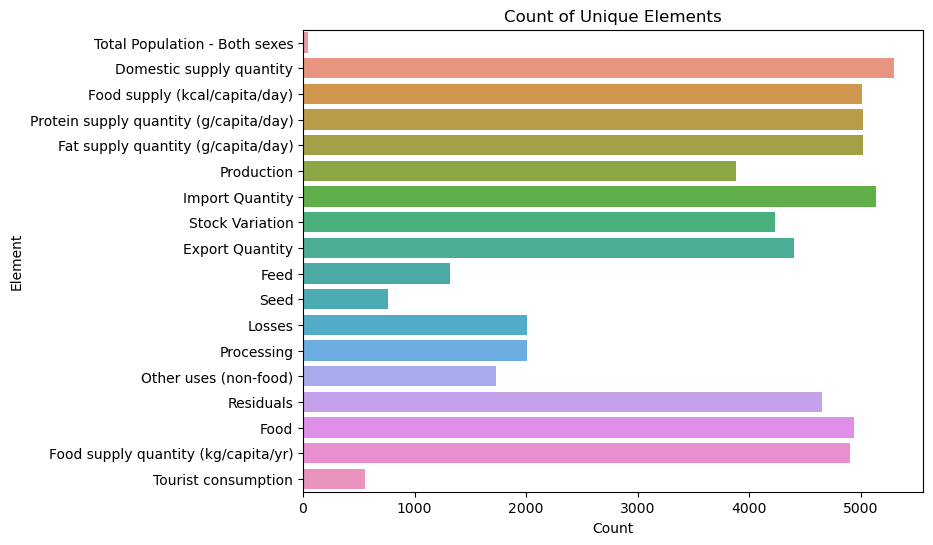

In [28]:
# Countplot of unique elements with rotated labels
plt.figure(figsize=(8, 6))
sns.countplot(y='Element', data=df)  # Use 'y' instead of 'x' for horizontal orientation
plt.title('Count of Unique Elements')
plt.xlabel('Count')  # Adjust the labels accordingly
plt.ylabel('Element')
plt.xticks(rotation=0)  # Rotate labels to 0 degrees for horizontal orientation
plt.show()